In [2]:
import numpy as np
import numpy.random as np_rand
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import math

def fill_matrix(n, d):
    p = np.zeros((n,n), dtype = int)
    k = int(n*n*d)
    for i in range(0,k):
        x, y = np_rand.randint(0,n,(2))
        while p[x,y] == 1:
            x, y = np_rand.randint(0,n,(2))
        p[x,y] = 1
    return p

def get_neighbours(x, y, n):
    l = []
    for x2 in range(x-1, x+2):
        for y2 in range(y-1, y+2):
            if (-1 < x < n 
                and -1 < y < n 
                and (x != x2 or y != y2) 
                and (0 <= x2 < n) 
                and (0 <= y2 < n)):
                l.append((x2, y2))
    return l

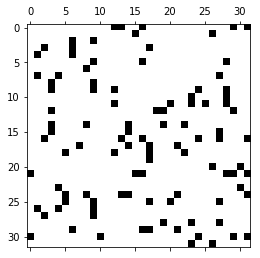

In [37]:
n = 32
d = 0.1
p = fill_matrix(n,d)
cmap = clr.ListedColormap(['w', 'k'])
plt.matshow(p, cmap = cmap)
plt.show()

In [42]:


sum = 0
for x in range(0,n):
    for y in range(0,n):
        nlist = get_neighbours(x,y,n)
        for neighbour in nlist:
            i, j = neighbour
            sum += p[i,j]
sum

775

In [ ]:
l = []
l.append